In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Importing CSV File
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
# Showing Data
data.head()
data.isnull().sum()
corre = data.corr()


<ipython-input-5-0ab3357d927a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = data.corr()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Dropping the Columns
data1 = data.drop(['Surname','CustomerId','RowNumber'],axis=1)

In [8]:
# Checking DataTypes
data1.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Describing the data1
data1.describe()

co = data1.corr()

<ipython-input-9-0160d8bc6aae>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = data1.corr()


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

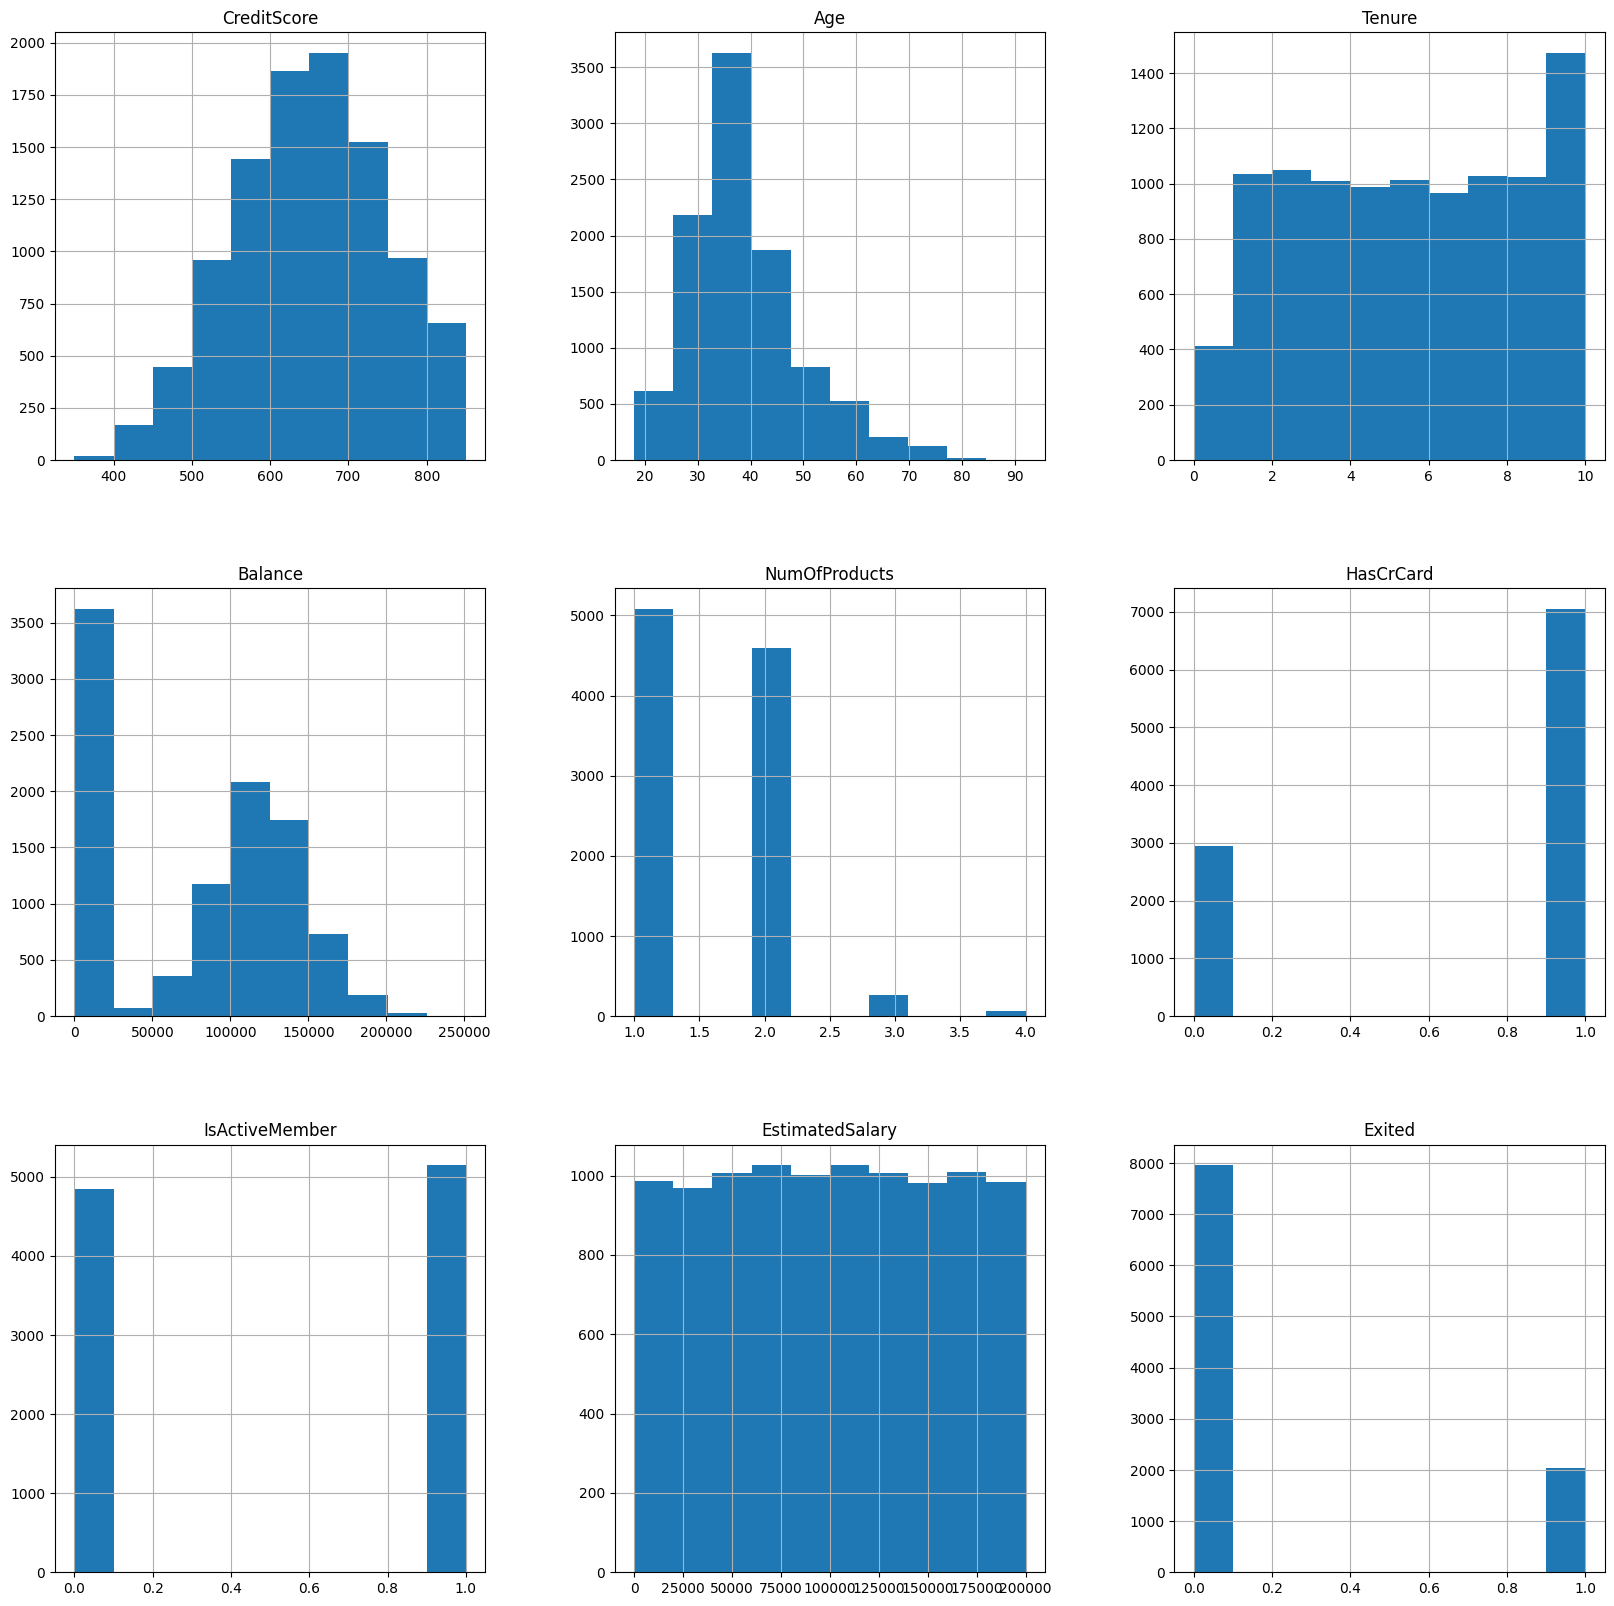

In [10]:
# This is Showing that the dataset is imbalanced
data1['Exited'].value_counts()
data1.hist(figsize=(20,20))


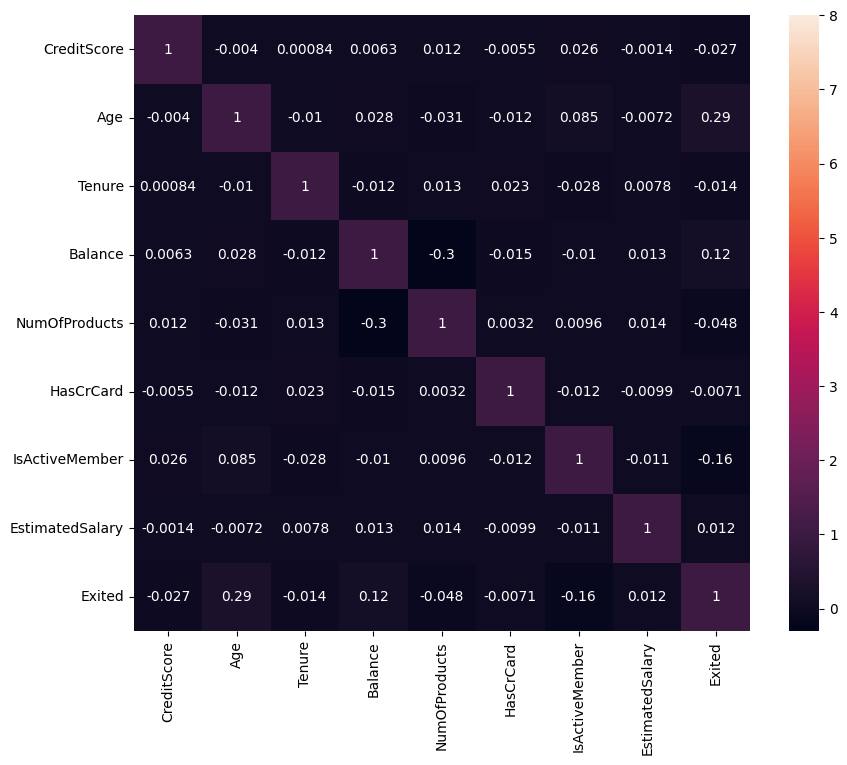

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(co, annot = True, vmax = 8, square = True)
plt.show()

In [12]:
data1.sample(10)
data1.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

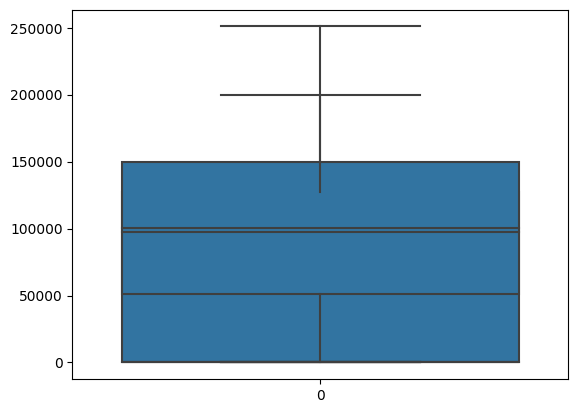

In [13]:
# Importing the seaborn library
sns.boxplot(data1['Balance'])
sns.boxplot(data1['EstimatedSalary'])
sns.boxplot(data1['Tenure'])

<Axes: xlabel='Exited', ylabel='count'>

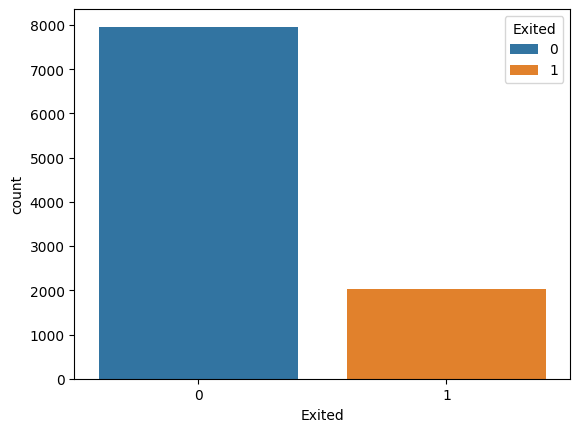

In [14]:
data1['Tenure'].value_counts()
sns.countplot(x = 'Tenure', hue = "Exited", data = data1)
sns.countplot(x = data1['Exited'], data = data1)

In [15]:
# For Geography
print("Before Encoding", data1['Geography'].unique())
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data1['Geography']=label.fit_transform(data1['Geography'])
print("After Encoding", data1['Geography'].unique())


Before Encoding ['France' 'Spain' 'Germany']
After Encoding [0 2 1]


In [16]:
# For Gender
print("Before Encoding", data1['Gender'].unique())
label = LabelEncoder()
data1['Gender']=label.fit_transform(data1['Gender'])
print("After Encoding", data1['Gender'].unique())


Before Encoding ['Female' 'Male']
After Encoding [0 1]


In [17]:
data1.head()
data1.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
zeros,ones = data1.Exited.value_counts()
fr1 = data1[data1['Exited']==1]
nfr1 = data1[data1['Exited']==0]
nfr1=nfr1.sample(n=ones, replace= False)
pdata = pd.concat([fr1,nfr1],axis=0)

In [19]:
data1['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
x = data1.drop('Exited', axis=1)
y = data1['Exited']
x.dtypes


CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [21]:
# Spliting the test and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 2)
x.shape
y.shape

(10000,)

In [22]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
x_train_Scaled = sclr.fit_transform(x_train)
x_test_Scaled = sclr.fit_transform(x_test)


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate = 0.17, random_state = 2)
print(model.fit(x_train, y_train))
y_pred = model.predict(x_test)


GradientBoostingClassifier(learning_rate=0.17, random_state=2)


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2015
           1       0.75      0.45      0.56       485

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [26]:
# Considering you've "y_pred" containing your model's predictions
conf_matrix = confusion_matrix(y_test, y_pred)

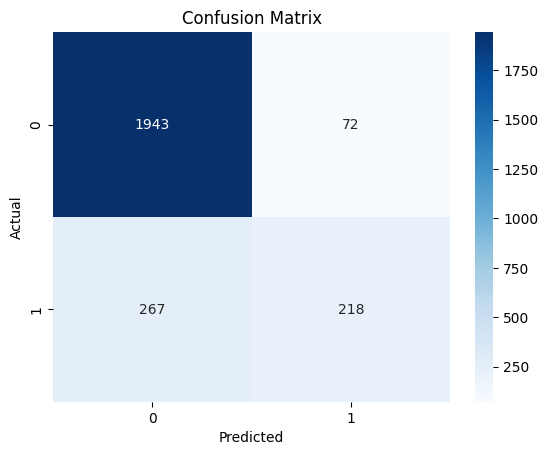

In [27]:
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
from sklearn.metrics import roc_curve, auc
 # Get Predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

In [29]:
# Calculating ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

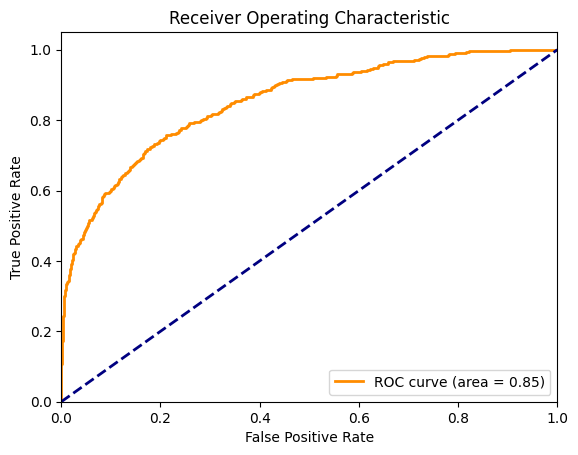

In [30]:
# Ploting ROC Curve
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

In [31]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)

y_pred1 = lg.predict(x_test)

In [32]:
# After Fitting the X & Y with Logistic Regression Algorithm Now let's Check the Confusion Matrix, Accuracy Score with its Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2015
           1       0.29      0.05      0.08       485

    accuracy                           0.79      2500
   macro avg       0.55      0.51      0.48      2500
weighted avg       0.71      0.79      0.73      2500



In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))


0.7916


In [34]:
from sklearn.metrics import roc_curve, auc
 # Get Predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]


In [35]:
# Calculating ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


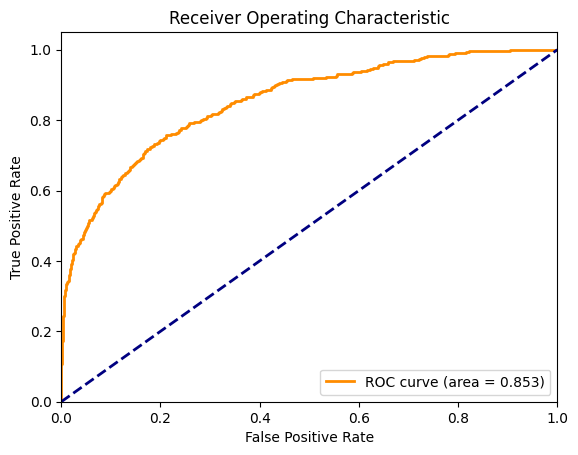

In [36]:
# Ploting ROC Curve
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

In [37]:
# Support Vector Classifier
from sklearn import svm
sv = svm.SVC()
sv.fit(x_train, y_train)

SVC()

In [38]:
y_pred2 = sv.predict(x_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2015
           1       0.00      0.00      0.00       485

    accuracy                           0.81      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.81      0.72      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.806


In [41]:
from sklearn.metrics import roc_curve, auc
 # Get Predicted probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]

In [42]:
# Calculating ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


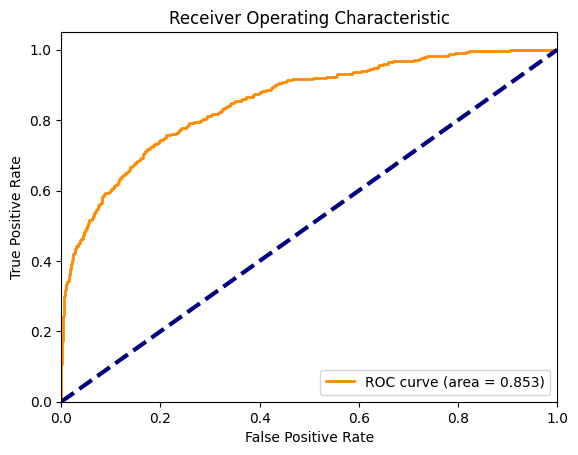

In [43]:
# Ploting ROC Curve
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 3, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

In [44]:
# Handling Imbalance Data Using SMOTE Module

from imblearn.over_sampling import SMOTE
x_re, y_re = SMOTE().fit_resample(x,y)
y_re.value_counts()

x_res = sclr.fit_transform(x_re)
sv.fit(x_re,y_re)


SVC()

In [45]:
import joblib
joblib.dump(sv, 'Prediction_Model_File')

prediction_part = joblib.load('Prediction_Model_File')

data1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [48]:
# So, Based Upon the Above Given Columns We Give Input as 11 Values for Prediction
# We import Warnings Module Inorder to Supress the Warnings in the Output
import warnings
warnings.filterwarnings('ignore')
# Prediction_Part
prediction_part.predict([[210,92,2,1.0,1,0,301.231,1,1,0]])


array([0])